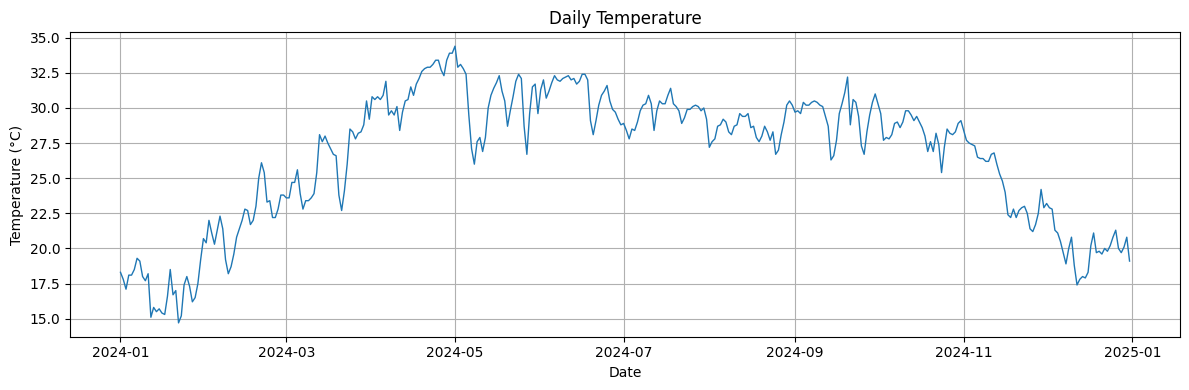

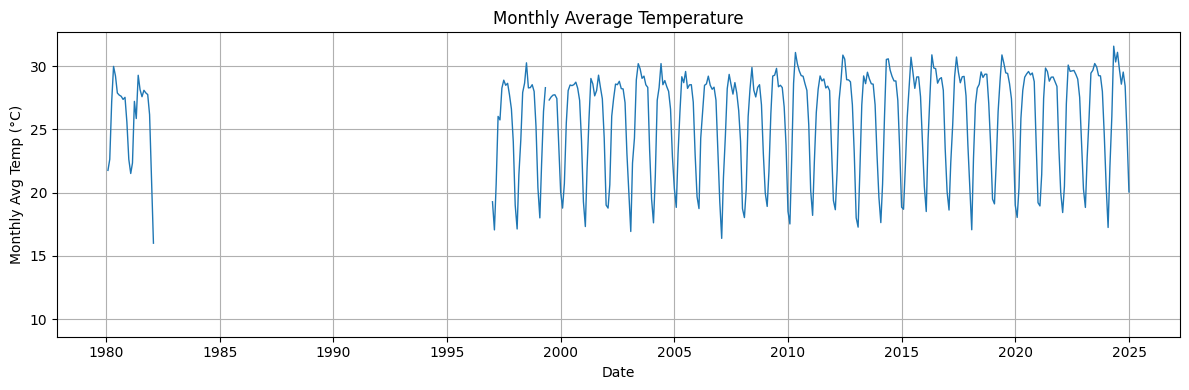

count    10478.000000
mean        23.407983
std          4.414779
min          2.990375
25%         19.901785
50%         25.362081
75%         26.983772
max         31.919478
Name: wet_bulb_C, dtype: float64
   day  month  year  temperature(degree C)  humidity       date  wet_bulb_C
0    1      1  1980                   21.7      77.1 1980-01-01   18.787098
1    2      1  1980                   20.8      64.4 1980-01-02   16.303332
2    3      1  1980                   23.0      60.2 1980-01-03   17.733379
3    4      1  1980                   22.3      70.4 1980-01-04   18.475789
4    5      1  1980                   22.1      67.8 1980-01-05   17.944936


In [ ]:


# ============================================================
# 9) WET BULB TEMPERATURE FUNCTION (Stull, 2011)
# ============================================================
def wet_bulb_temp_C(T_c, RH):
    """
    Stull (2011) empirical wet-bulb temperature formula
    T in °C, RH in %
    """
    T = float(T_c)
    R = float(RH)

    Tw = T * np.arctan(0.151977 * np.sqrt(R + 8.313659)) \
         + np.arctan(T + R) - np.arctan(R - 1.676331) \
         + 0.00391838 * (R ** 1.5) * np.arctan(0.023101 * R) \
         - 4.686035

    return Tw

# ============================================================
# 10) COMPUTE WET BULB TEMPERATURE
# ============================================================
with_no_null_WB['wet_bulb_C'] = with_no_null_WB.apply(
    lambda r: wet_bulb_temp_C(r['temperature(degree C)'], r['humidity']),
    axis=1
)

print(with_no_null_WB['wet_bulb_C'].describe())
print(with_no_null_WB.head())

